<a href="https://colab.research.google.com/github/MattJCR/PIA_Zalando/blob/master/PIA_Zalando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.kaggle.com/datasets/zalando-research/fashionmnist
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
display(np.unique(train_labels))
display(np.unique(test_labels))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

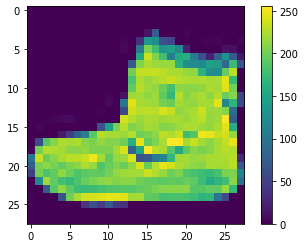

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

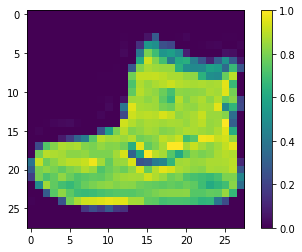

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

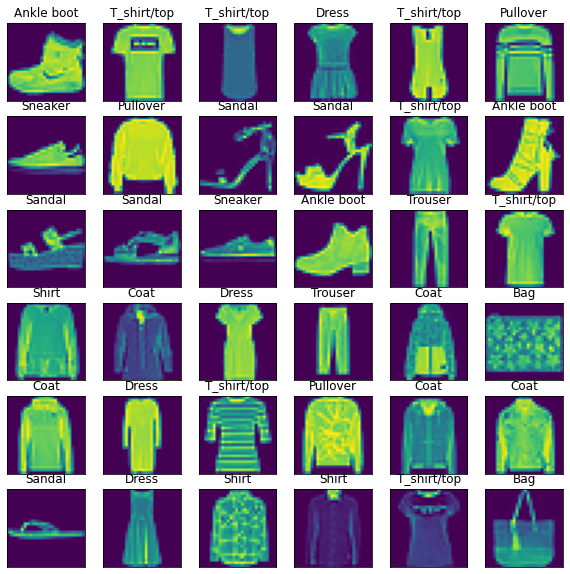

In [9]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape((28,28)))
    label_index = int(train_labels[i])
    plt.title(class_names[label_index])
plt.show()

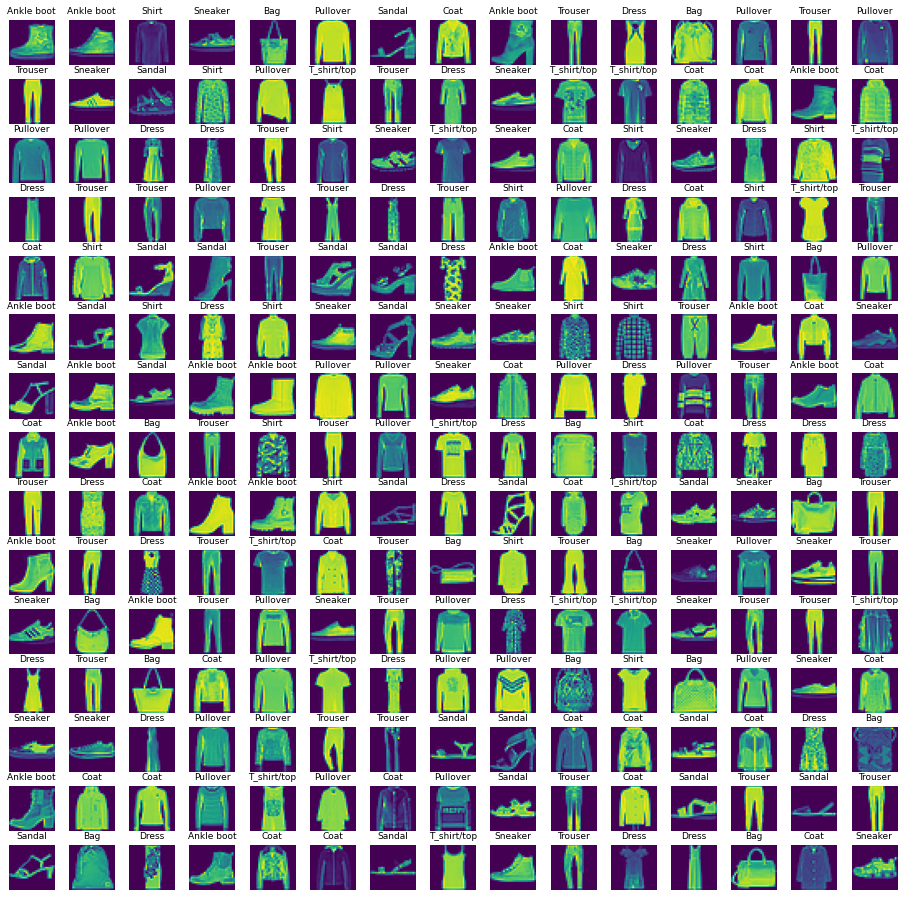

In [10]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_images) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_images[index].reshape((28,28)) )
    labelindex = int(train_labels[index])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

In [46]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
# Crear un modelo de red neuronal
model = Sequential()
input_shape=train_images.shape[1:]
print(f"input_shape={train_images.shape[1:]}")
# Agregar una capa de entrada que aplane la imagen en un vector de una sola dimensión
model.add(Flatten(input_shape=input_shape))

# Agregar dos capas ocultas con la función de activación ReLU y la capa de abandono
model.add(Dense(len(class_names)*4, activation='relu',kernel_initializer='he_uniform'))
# model.add(Dropout(0.25))
model.add(Dense(len(class_names)*2, activation='relu',kernel_initializer='he_uniform'))
# model.add(Dropout(0.25))
# Agregar una capa de salida con la función de activación softmax
model.add(Dense(len(class_names), activation='softmax', kernel_initializer='glorot_uniform'))

# Definir el optimizador
optimizer = Adam(learning_rate=0.01)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Definir early stopping
early_stop = EarlyStopping(monitor='accuracy', patience=12, mode='max')

# Definir reducción del learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='min', min_lr=0.0001, verbose=1)

input_shape=(28, 28)


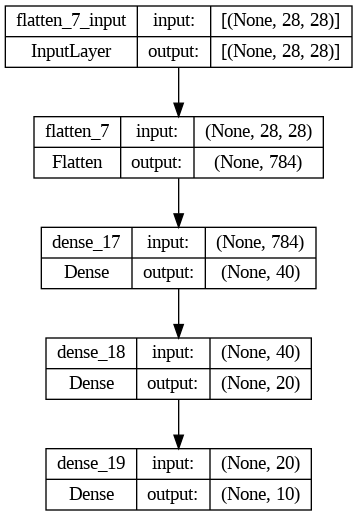

In [47]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [48]:
multi_train_labels = np.zeros((len(train_labels), 10), dtype=np.uint8)

for i in range(len(train_labels)):
    multi_train_labels[i, train_labels[i]] = 1

multi_test_labels = np.zeros((len(test_labels), 10), dtype=np.uint8)

for i in range(len(test_labels)):
    multi_test_labels[i, test_labels[i]] = 1

In [39]:
multi_train_labels[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [40]:
multi_test_labels[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

In [49]:
import math
batch_size = int(math.sqrt(len(train_images)))
print(f"batch_size={batch_size}")
# Reiniciar estados de las funciones de monitoreo
for callback in [early_stop, reduce_lr]:
    callback.on_train_begin()
# Entrenar el modelo con reducción del learning rate
history = model.fit(train_images, multi_train_labels, validation_data=(test_images, multi_test_labels), epochs=1000, batch_size=batch_size, callbacks=[early_stop,reduce_lr], use_multiprocessing=True)

batch_size=244
Epoch 1/1000
246/246 [==============================] - 3s 9ms/step - loss: 0.6014 - accuracy: 0.7895 - val_loss: 0.4933 - val_accuracy: 0.8216 - lr: 0.0100
Epoch 2/1000
246/246 [==============================] - 2s 8ms/step - loss: 0.4193 - accuracy: 0.8493 - val_loss: 0.4289 - val_accuracy: 0.8461 - lr: 0.0100
Epoch 3/1000
246/246 [==============================] - 2s 7ms/step - loss: 0.3846 - accuracy: 0.8603 - val_loss: 0.4187 - val_accuracy: 0.8483 - lr: 0.0100
Epoch 4/1000
246/246 [==============================] - 2s 7ms/step - loss: 0.3703 - accuracy: 0.8647 - val_loss: 0.3901 - val_accuracy: 0.8614 - lr: 0.0100
Epoch 5/1000
246/246 [==============================] - 2s 7ms/step - loss: 0.3563 - accuracy: 0.8703 - val_loss: 0.3925 - val_accuracy: 0.8598 - lr: 0.0100
Epoch 6/1000
246/246 [==============================] - 2s 6ms/step - loss: 0.3508 - accuracy: 0.8715 - val_loss: 0.3891 - val_accuracy: 0.8615 - lr: 0.0100
Epoch 7/1000
246/246 [=====================

In [50]:
# evaluate the keras model
_, accuracy = model.evaluate(test_images, multi_test_labels)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.4085 - accuracy: 0.8761
Accuracy: 87.61


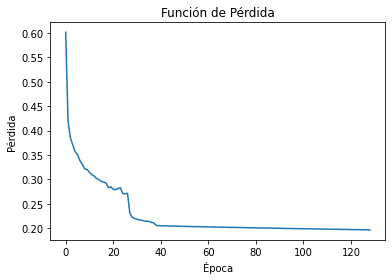

In [51]:
# Graficar la evolución de la función de pérdida
plt.plot(history.history['loss'])
plt.title('Función de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

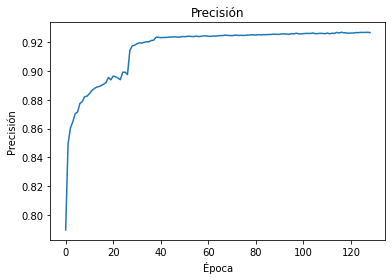

In [52]:
# Graficar la evolución de la métrica de evaluación (en este caso, precisión)
plt.plot(history.history['accuracy'])
plt.title('Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.show()